In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('1.03. Dummies.csv')
df.head()

SAT   GPA Attendance
0  1714  2.40         No
1  1664  2.52         No
2  1760  2.54         No
3  1685  2.74         No
4  1693  2.83         No

In [3]:
df.describe()

SAT        GPA
count    84.000000  84.000000
mean   1845.273810   3.330238
std     104.530661   0.271617
min    1634.000000   2.400000
25%    1772.000000   3.190000
50%    1846.000000   3.380000
75%    1934.000000   3.502500
max    2050.000000   3.810000

In [4]:
dane = df.copy()

In [5]:
dane['Attendance'] = dane['Attendance'].map({'Yes':1, 'No':0})

In [6]:
dane.head()

SAT   GPA  Attendance
0  1714  2.40           0
1  1664  2.52           0
2  1760  2.54           0
3  1685  2.74           0
4  1693  2.83           0

In [8]:
dane.describe()

SAT        GPA  Attendance
count    84.000000  84.000000   84.000000
mean   1845.273810   3.330238    0.464286
std     104.530661   0.271617    0.501718
min    1634.000000   2.400000    0.000000
25%    1772.000000   3.190000    0.000000
50%    1846.000000   3.380000    0.000000
75%    1934.000000   3.502500    1.000000
max    2050.000000   3.810000    1.000000

### Regresja

In [9]:
y = dane['GPA']
x1 = dane[['SAT', 'Attendance']]

In [10]:
x = sm.add_constant(x1)
wynik = sm.OLS(y,x).fit()
wynik.summary()

C:\Anaconda3\envs\ds\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           2.19e-15
Time:                        15:39:37   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Wzór
**GPA = 0.6439 + 0.0014 * SAT + 0,2226 * Dummy (0 lub 1)**
Czyli są dwa równania:
**Stare: GPA = 0.8665 + 0.0014 * SAT**
**i Nowe: 0.6439 + 0.0014 * SAT**

Text(0, 0.5, 'GPA')

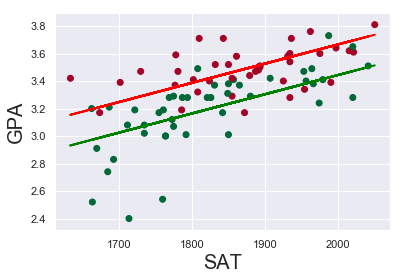

In [14]:
plt.scatter(dane['SAT'], y, c=dane['Attendance'], cmap='RdYlGn_r');
yhat_no = 0.6439 + 0.0014 * dane['SAT']
yhat_yes = 0.8665 + 0.0014 * dane['SAT']
fig = plt.plot(dane['SAT'], yhat_no, lw=2, c='green',)
fig = plt.plot(dane['SAT'], yhat_yes, lw=2, c='red')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)

Text(0, 0.5, 'GPA')

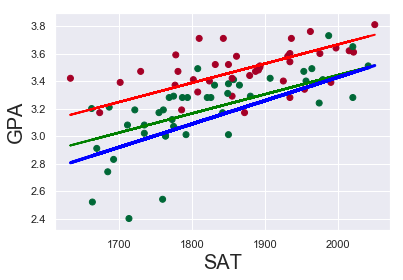

In [15]:
plt.scatter(dane['SAT'], y, c=dane['Attendance'], cmap='RdYlGn_r');
yhat_no = 0.6439 + 0.0014 * dane['SAT']
yhat_yes = 0.8665 + 0.0014 * dane['SAT']
yhat = 0.0017*dane['SAT'] + .0275
fig = plt.plot(dane['SAT'], yhat_no, lw=2, c='green',)
fig = plt.plot(dane['SAT'], yhat_yes, lw=2, c='red')
fig = plt.plot(dane['SAT'], yhat, lw=3, c='blue', label='linia regresji')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)